In [2]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

try:
    %tensorflow_version 2.x  # Colab only.
except Exception:
    pass

import tensorflow as tf
print(tf.__version__)

2.3.1


In [9]:
# additional imports

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model

plt.style.use('ggplot')

In [4]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)

x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000,)


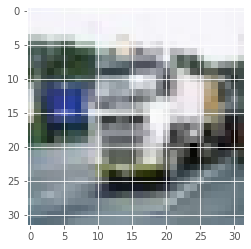

In [11]:
plt.imshow(x_train[1000])

In [5]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [12]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [13]:
# Compile and fit
# Note: make sure you are using the GPU for this!
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 40s 25ms/step - loss: 1.5526 - accuracy: 0.4348 - val_loss: 1.4177 - val_accuracy: 0.5019
Epoch 2/15
1563/1563 [==============================] - 39s 25ms/step - loss: 1.2747 - accuracy: 0.5422 - val_loss: 1.1489 - val_accuracy: 0.5849
Epoch 3/15
1563/1563 [==============================] - 38s 25ms/step - loss: 1.1531 - accuracy: 0.5898 - val_loss: 1.1666 - val_accuracy: 0.5801
Epoch 4/15
1563/1563 [==============================] - 40s 26ms/step - loss: 1.0630 - accuracy: 0.6236 - val_loss: 0.9788 - val_accuracy: 0.6536
Epoch 5/15
1563/1563 [==============================] - 39s 25ms/step - loss: 0.9899 - accuracy: 0.6484 - val_loss: 0.9537 - val_accuracy: 0.6674
Epoch 6/15
1563/1563 [==============================] - 38s 25ms/step - loss: 0.9307 - accuracy: 0.6674 - val_loss: 0.9308 - val_accuracy: 0.6769
Epoch 7/15
1563/1563 [==============================] - 38s 24ms/step - loss: 0.8757 - accuracy: 0.6896 - val_loss: 0.8894 -

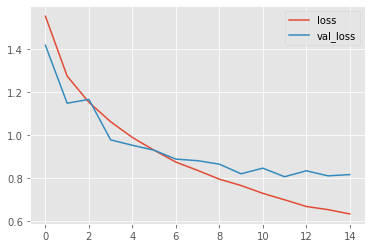

In [14]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

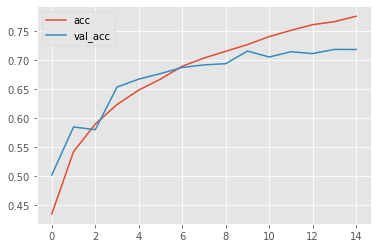

In [15]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[785  18  34  11  19   5   4  20  64  40]
 [ 15 856   1   5   1   5   8   9  18  82]
 [ 79  11 507  62 115  69  80  52  16   9]
 [ 23  12  55 488  72 164  90  54  14  28]
 [ 24   4  39  63 704  19  57  80   8   2]
 [  8   6  29 181  61 581  40  74  11   9]
 [  6   7  25  38  42  20 837  11   9   5]
 [ 14   1  20  31  53  43   5 803   6  24]
 [ 56  43  12  10   7   4   5   9 834  20]
 [ 32  87   7   9   7   3  12  16  37 790]]


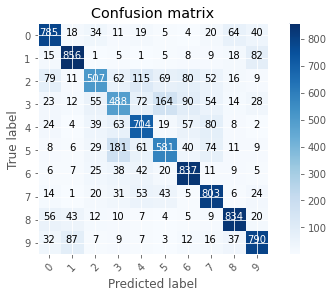

In [16]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), 
                 horizontalalignment="center", 
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



In [17]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

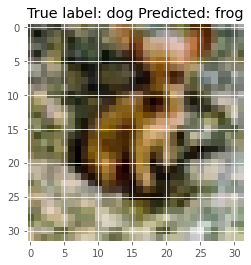

In [21]:
# Show some misclassified examples
# TODO: add label names
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

In [22]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 15, 15, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)             